Here, we use gene-regulatory networks inferred from single-cell multi-omics data to perform in silico transcription factor(TF) perturbations, simulating the consequent changes such as traget gene and differentiation direction using only unperturbed wild-type data.

## Predict the original gene expression
We first predict the gene expression based on LINGER neural network-based model. We use this to represent the wild type context transcriptional profile.

In [ ]:
from LingerGRN.perturb import *
# insilico pertubation
outdir='/zfs/durenlab/palmetto/Kaya/SC_NET/code/github/combine/LINGER/examples/output/' #output dir
Datadir='/zfs/durenlab/palmetto/Kaya/SC_NET/code/github/combine/'# this directory should be the same with Datadir
GRNdir=Datadir+'data_bulk/'
Input_dir= '/zfs/durenlab/palmetto/Kaya/SC_NET/code/github/combine/LINGER/examples/'# input data dir
chrall,data_merge,Exp,Opn,Target,idx,TFname=load_data_ptb(Input_dir,outdir,GRNdir)
original=get_simulation(outdir,chrall,data_merge,GRNdir,Exp,Opn,Target,idx)
original.to_csv(outdir+'original.txt',sep='\t')
original

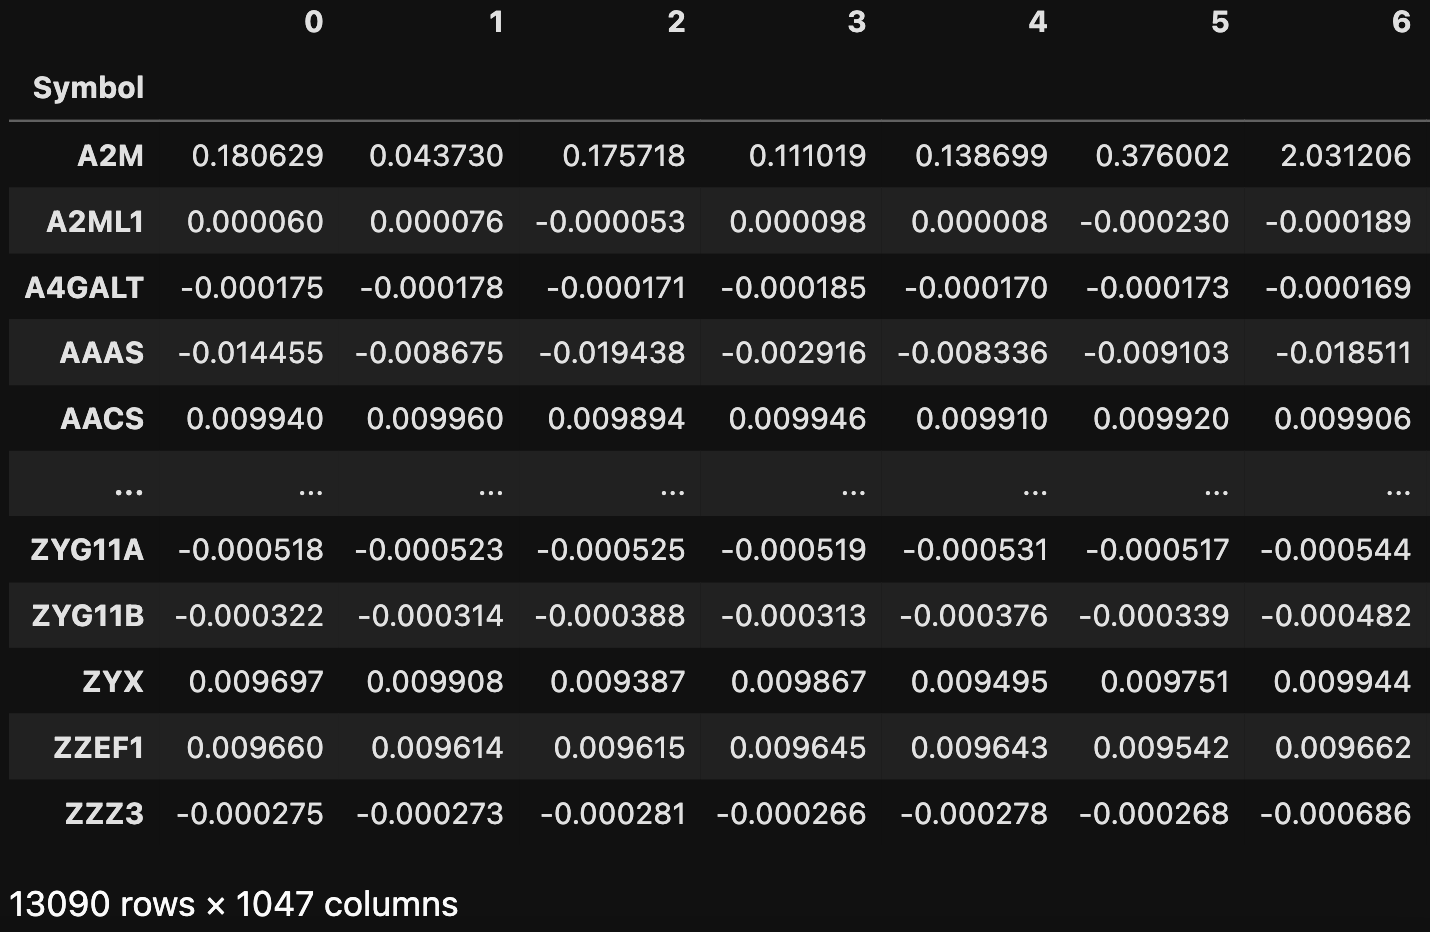

## Predict the gene expression after TF perturbation
We predict the gene expression after kouck out one TF or several together. We take the POU5F1 as an example, which is a master regulator of H1 cell line (stem cell).

In [ ]:
TFko='POU5F1'# multiple TFs: TFko=[TF1 TF2 ...]
import pandas as pd
Exp_df=pd.DataFrame(Exp,index=TFname)
Exp1=Exp_df.copy()
Exp1.loc[TFko]=0
perturb=get_simulation(outdir,chrall,data_merge,GRNdir,Exp1.values,Opn,Target,idx)
perturb.to_csv(outdir+TFko+'.txt',sep='\t')
perturb

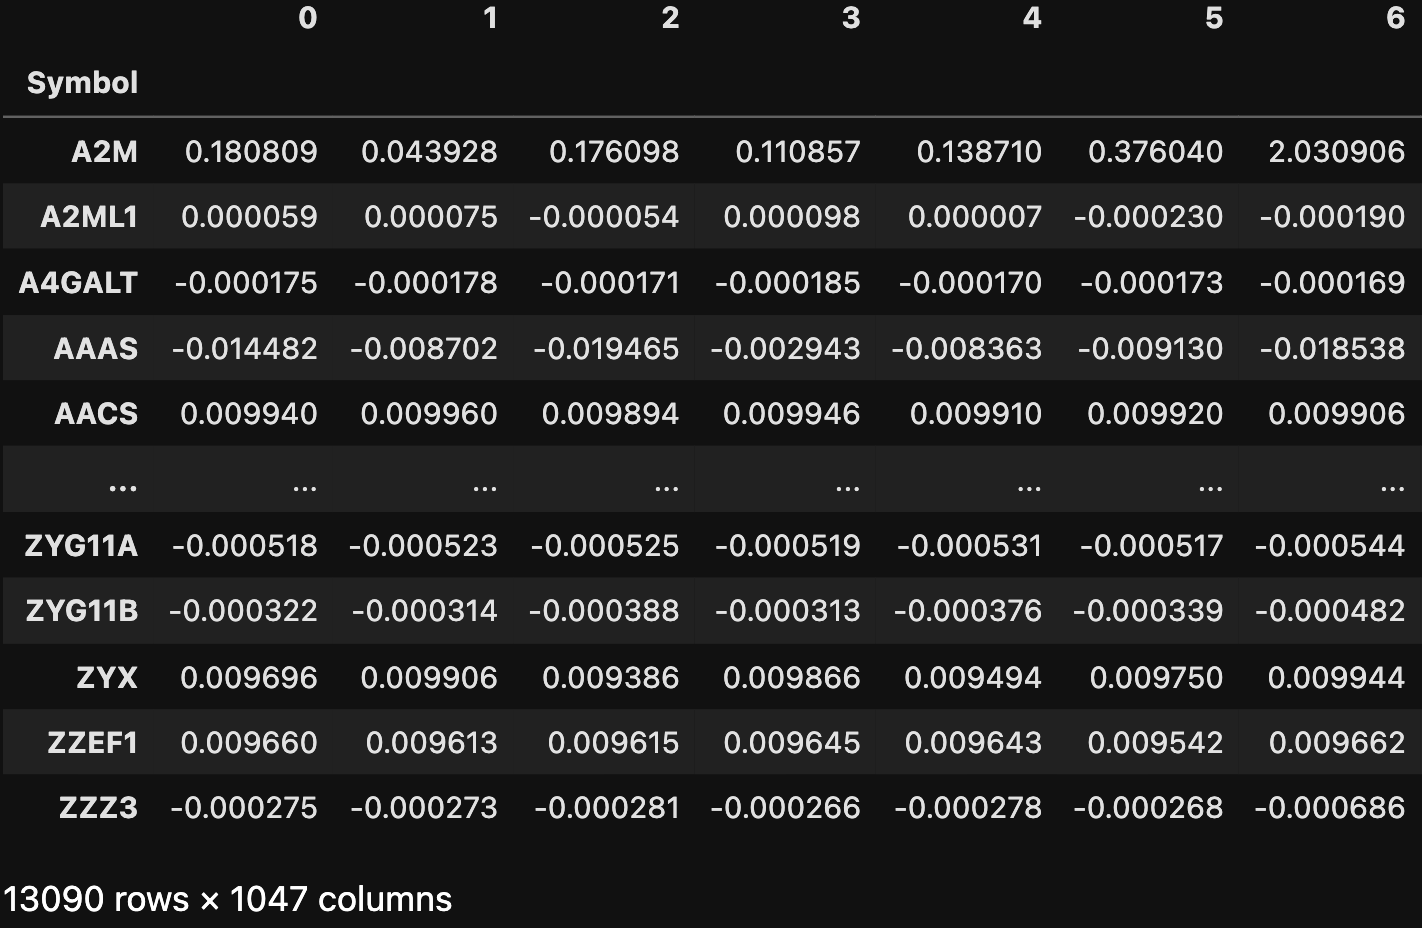

## Differential expression for single cell
We visualize the differential expression of the target gene. We take the POU5F1's target gene, NANOG, as an example. We set save = True to save the figure to outdir (Kouckout TF+'KO_Diff_exp_Umap'+Target gene.png). The cell types of cluster 0 to 3 are H1, BJ, K562, and GM12878, respectively.

In [ ]:
embedding,D=umap_embedding(outdir,Target,original,perturb,Input_dir)
TG='NANOG'
save=True
diff_umap(TFko,TG,save,outdir,embedding,perturb,original,Input_dir)

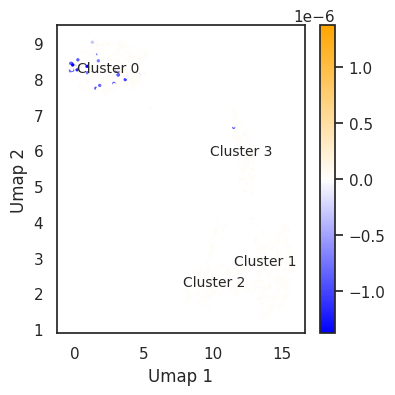
The above result suggests that NANOG expression decreased in H1 cell line after POU5F1 knockout.

## Differentiation prediction
We get the embedding of original and perturbed gene expression to the same embedding space. Then we get the difference of embedding to represent the differentiation prediction after the perturbatiion. The figure will be saved as Kouckout TF+'KO_Differentiation_Umap.png'. The cell types of cluster 0 to 3 are H1, BJ, K562, and GM12878, respectively.  
我们将原始基因表达和扰动基因表达嵌入同一嵌入空间。然后求出嵌入的差值，以表示扰动后的分化预测结果。该图将被保存为 Kouckout TF+'KO_Differentiation_Umap.png'。第 0 至第 3 组的细胞类型分别为 H1、BJ、K562 和 GM12878。

In [ ]:
save=True
Umap_direct(TFko,Input_dir,embedding,D,save,outdir)

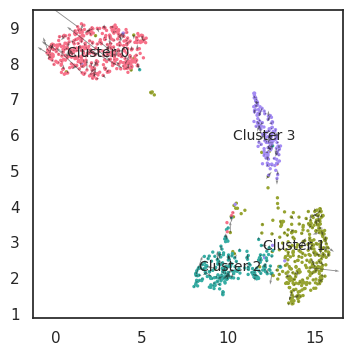
POU5F1 knock out simulation yeilds a potential shift of H1 cell line.  
但是我感觉这个图真的没有celloracle好看